# Question 1

Read the data for January. How many columns are there? Answe =r 19 columns

In [1]:
import pandas as pd

In [2]:
import pickle

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.metrics import mean_squared_error


In [5]:
df = pd.read_parquet(r"C:\Users\folio\Downloads\alisave-productid-1601292062044_storeid-241758250\main_images\yellow_tripdata_2023-01.parquet")
df.tpep_dropoff_datetime = pd.to_datetime(df.tpep_dropoff_datetime)
df.tpep_pickup_datetime = pd.to_datetime(df.tpep_pickup_datetime)


df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
df.duration = df.duration.apply(lambda td: td.total_seconds()/60)


df = df[(df.duration >=1)&(df.duration <=60)]


categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']


df[categorical] = df[categorical].astype(str)



In [6]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.30,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00,8.433333
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.90,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00,6.316667
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.90,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00,12.750000
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.10,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25,9.616667
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.40,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00,10.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3066761,2,2023-01-31 23:58:34,2023-02-01 00:12:33,NaN,3.05,NaN,None,107,48,0,15.80,0.00,0.5,3.96,0.0,1.0,23.76,NaN,NaN,13.983333
3066762,2,2023-01-31 23:31:09,2023-01-31 23:50:36,NaN,5.80,NaN,None,112,75,0,22.43,0.00,0.5,2.64,0.0,1.0,29.07,NaN,NaN,19.450000
3066763,2,2023-01-31 23:01:05,2023-01-31 23:25:36,NaN,4.67,NaN,None,114,239,0,17.61,0.00,0.5,5.32,0.0,1.0,26.93,NaN,NaN,24.516667
3066764,2,2023-01-31 23:40:00,2023-01-31 23:53:00,NaN,3.15,NaN,None,230,79,0,18.15,0.00,0.5,4.43,0.0,1.0,26.58,NaN,NaN,13.000000


In [7]:
df.tpep_dropoff_datetime = pd.to_datetime(df.tpep_dropoff_datetime)
df.tpep_pickup_datetime = pd.to_datetime(df.tpep_pickup_datetime)

In [8]:
df.tpep_dropoff_datetime - df.tpep_pickup_datetime 

0         0 days 00:08:26
1         0 days 00:06:19
2         0 days 00:12:45
3         0 days 00:09:37
4         0 days 00:10:50
                ...      
3066761   0 days 00:13:59
3066762   0 days 00:19:27
3066763   0 days 00:24:31
3066764   0 days 00:13:00
3066765   0 days 00:14:24
Length: 3009173, dtype: timedelta64[ns]

In [9]:
df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime 

In [10]:
td = df.duration.iloc[0]

In [11]:
td.total_seconds()/60

8.433333333333334

In [12]:
df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
df.duration = df.duration.apply(lambda td: td.total_seconds()/60)

In [13]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.30,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00,8.433333
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.90,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00,6.316667
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.90,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00,12.750000
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.10,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25,9.616667
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.40,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00,10.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3066761,2,2023-01-31 23:58:34,2023-02-01 00:12:33,NaN,3.05,NaN,None,107,48,0,15.80,0.00,0.5,3.96,0.0,1.0,23.76,NaN,NaN,13.983333
3066762,2,2023-01-31 23:31:09,2023-01-31 23:50:36,NaN,5.80,NaN,None,112,75,0,22.43,0.00,0.5,2.64,0.0,1.0,29.07,NaN,NaN,19.450000
3066763,2,2023-01-31 23:01:05,2023-01-31 23:25:36,NaN,4.67,NaN,None,114,239,0,17.61,0.00,0.5,5.32,0.0,1.0,26.93,NaN,NaN,24.516667
3066764,2,2023-01-31 23:40:00,2023-01-31 23:53:00,NaN,3.15,NaN,None,230,79,0,18.15,0.00,0.5,4.43,0.0,1.0,26.58,NaN,NaN,13.000000


In [14]:
df = df[df.trip_distance == 2]

In [15]:
df.duration.describe(percentiles=[0.95,0.98,0.99,0.92,0.90])

count    24699.000000
mean        13.078971
std          4.113585
min          1.483333
50%         12.500000
90%         18.300000
92%         19.000000
95%         20.416667
98%         23.133333
99%         25.483333
max         56.883333
Name: duration, dtype: float64

C:\Users\folio\AppData\Local\Temp\ipykernel_14140\3426635498.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.duration)


<Axes: xlabel='duration', ylabel='Density'>

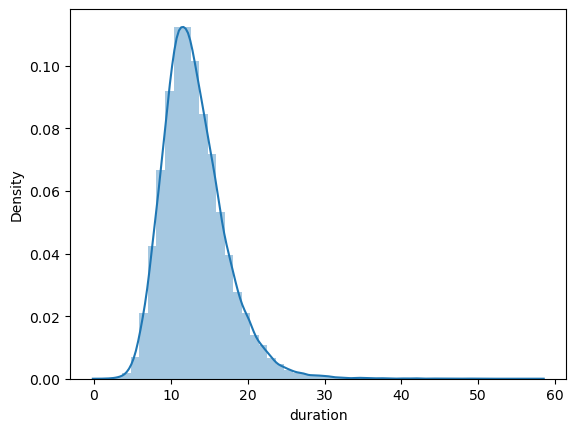

In [16]:
sns.distplot(df.duration)

In [17]:
df.duration.describe()

count    24699.000000
mean        13.078971
std          4.113585
min          1.483333
25%         10.266667
50%         12.500000
75%         15.275000
max         56.883333
Name: duration, dtype: float64

In [18]:
df.duration

251        11.250000
269        13.500000
592        13.633333
604         6.150000
627         8.350000
             ...    
3065983    10.700000
3066247    14.900000
3066519    10.933333
3066674    11.283333
3066709    13.533333
Name: duration, Length: 24699, dtype: float64

In [19]:
((df.duration >=1) & (df.duration <=60)).mean()

1.0

In [20]:
df = df[(df.duration >=1)&(df.duration <=60)]

In [21]:
categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']

In [22]:
df[categorical] = df[categorical].astype(str)

In [23]:
df.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                     object
DOLocationID                     object
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee                     float64
duration                        float64
dtype: object

In [24]:
train_dicts = df[categorical + numerical].to_dict(orient='records')

dv = DictVectorizer()
x_train = dv.fit_transform(train_dicts)


target = 'duration'
y_train = df[target].values

lr = LinearRegression()
lr.fit(x_train,y_train)

y_pred = lr.predict(x_train)

mean_squared_error(y_train ,y_pred, squared=False)

3.8395115509904225

In [25]:
x_train

<24699x306 sparse matrix of type '<class 'numpy.float64'>'
	with 74097 stored elements in Compressed Sparse Row format>

In [26]:
dv.feature_names_

['DOLocationID=10',
 'DOLocationID=100',
 'DOLocationID=101',
 'DOLocationID=106',
 'DOLocationID=107',
 'DOLocationID=108',
 'DOLocationID=112',
 'DOLocationID=113',
 'DOLocationID=114',
 'DOLocationID=116',
 'DOLocationID=12',
 'DOLocationID=122',
 'DOLocationID=123',
 'DOLocationID=125',
 'DOLocationID=127',
 'DOLocationID=129',
 'DOLocationID=13',
 'DOLocationID=130',
 'DOLocationID=131',
 'DOLocationID=132',
 'DOLocationID=133',
 'DOLocationID=134',
 'DOLocationID=135',
 'DOLocationID=137',
 'DOLocationID=138',
 'DOLocationID=139',
 'DOLocationID=140',
 'DOLocationID=141',
 'DOLocationID=142',
 'DOLocationID=143',
 'DOLocationID=144',
 'DOLocationID=145',
 'DOLocationID=146',
 'DOLocationID=148',
 'DOLocationID=149',
 'DOLocationID=151',
 'DOLocationID=152',
 'DOLocationID=155',
 'DOLocationID=157',
 'DOLocationID=158',
 'DOLocationID=159',
 'DOLocationID=160',
 'DOLocationID=161',
 'DOLocationID=162',
 'DOLocationID=163',
 'DOLocationID=164',
 'DOLocationID=166',
 'DOLocationID=1

In [27]:
print(x_train.shape)

(24699, 306)


In [28]:
y_train

array([11.25      , 13.5       , 13.63333333, ..., 10.93333333,
       11.28333333, 13.53333333])

In [29]:
print(y_train.shape)

(24699,)


In [30]:
print(len(y_train))

24699


In [31]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
251,1,2023-01-01 00:42:18,2023-01-01 00:53:33,1.0,2.0,1.0,N,41,238,1,12.80,3.5,0.5,3.55,0.0,1.0,21.35,2.5,0.0,11.250000
269,1,2023-01-01 00:38:56,2023-01-01 00:52:26,4.0,2.0,1.0,N,163,236,1,12.80,3.5,0.5,4.45,0.0,1.0,22.25,2.5,0.0,13.500000
592,1,2023-01-01 00:23:42,2023-01-01 00:37:20,2.0,2.0,1.0,N,114,164,1,12.80,3.5,0.5,3.55,0.0,1.0,21.35,2.5,0.0,13.633333
604,2,2023-01-01 00:21:43,2023-01-01 00:27:52,1.0,2.0,1.0,N,161,141,2,10.00,1.0,0.5,0.00,0.0,1.0,15.00,2.5,0.0,6.150000
627,1,2023-01-01 00:38:33,2023-01-01 00:46:54,2.0,2.0,1.0,N,236,142,1,11.40,3.5,0.5,3.00,0.0,1.0,19.40,2.5,0.0,8.350000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3065983,1,2023-01-31 16:37:36,2023-01-31 16:48:18,NaN,2.0,NaN,None,239,43,0,12.10,2.5,0.5,2.79,0.0,1.0,21.39,NaN,NaN,10.700000
3066247,1,2023-01-31 18:23:57,2023-01-31 18:38:51,NaN,2.0,NaN,None,43,238,0,13.50,2.5,0.5,2.00,0.0,1.0,22.00,NaN,NaN,14.900000
3066519,2,2023-01-31 21:32:11,2023-01-31 21:43:07,NaN,2.0,NaN,None,45,107,0,14.56,0.0,0.5,3.34,0.0,1.0,21.90,NaN,NaN,10.933333
3066674,1,2023-01-31 22:32:05,2023-01-31 22:43:22,NaN,2.0,NaN,None,161,107,0,12.80,1.0,0.5,2.67,0.0,1.0,20.47,NaN,NaN,11.283333


C:\Users\folio\AppData\Local\Temp\ipykernel_14140\1073961326.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label= 'prediction')
C:\Users\folio\AppData\Local\Temp\ipykernel_14140\1073961326.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train, label='actual')


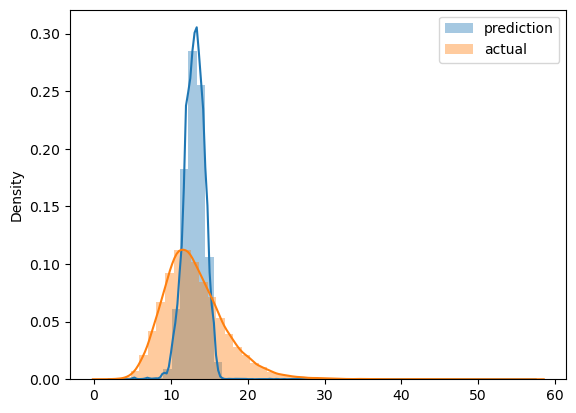

In [32]:
sns.distplot(y_pred, label= 'prediction')
sns.distplot(y_train, label='actual')


plt.legend()

In [33]:
def read_dataframe(filename):
    df = pd.read_parquet(filename)
    

    df.tpep_dropoff_datetime = pd.to_datetime(df.tpep_dropoff_datetime)
    df.tpep_pickup_datetime = pd.to_datetime(df.tpep_pickup_datetime)


    df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
    df.duration = df.duration.apply(lambda td: td.total_seconds()/60)


    df = df[(df.duration >=1)&(df.duration <=60)]


    categorical = ['PULocationID', 'DOLocationID']
    df[categorical] = df[categorical].astype(str)
    
    
    return df


    

In [34]:


df_train = read_dataframe(r"C:\Users\folio\Downloads\alisave-productid-1601292062044_storeid-241758250\main_images\yellow_tripdata_2023-01.parquet")
df_val =  read_dataframe(r"C:\Users\folio\Downloads\alisave-productid-1601292062044_storeid-241758250\main_images\yellow_tripdata_2023-02.parquet")
   

In [35]:
len(df_train), len(df_val)

(3009173, 2855951)

In [36]:
categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance','duration']

dv = DictVectorizer()

train_dicts = df_train[categorical + numerical].to_dict(orient='records')
x_train = dv.fit_transform(train_dicts)

val_dicts = df_val[categorical + numerical].to_dict(orient='records')
x_val = dv.transform(val_dicts)

In [37]:
target = 'duration'
y_train = df_train[target].values
y_val = df_val[target].values

In [38]:
lr = LinearRegression()
lr.fit(x_train, y_train)

y_pred = lr.predict(x_val)

mean_squared_error(y_val ,y_pred, squared=False)

0.0002446739415348183

In [41]:
lr = Lasso(alpha=0.1)
lr.fit(x_train, y_train)

y_pred = lr.predict(x_val)

mean_squared_error(y_val ,y_pred, squared=False)

0.010190838893269235